In [ ]:
! pip install tika
!pip3 install fuzzywuzzy

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import re
import pickle
import joblib
from fuzzywuzzy import fuzz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Assignments/Self Case Study 1/dataset

/content/drive/MyDrive/Colab Notebooks/Assignments/Self Case Study 1/dataset


In [ ]:
from tika import parser 
df = pd.DataFrame(columns = ['CandidateID', 'resume', 'cleaned_resume'])
for dirname, _, filenames in os.walk('trainResumes'):
 for filename in filenames:
  path = os.path.join(dirname, filename)
  raw = parser.from_file(path)
  df = df.append({'CandidateID' : filename[:-4], 'resume' : " ".join(raw['content'].strip().split('\n')[1:]), 'cleaned_resume' : ""}, 
    ignore_index = True)
df.shape

(95, 3)

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Self Case Study 1/dataset/train.csv")
train_df.set_index('CandidateID',inplace=True)
df.set_index('CandidateID',drop = False,inplace=True)
train_df = train_df.join(df)
train_df.head()

,Match Percentage,CandidateID,resume,cleaned_resume
CandidateID,,,,
candidate_011,13.60,candidate_011,L I A M A N D R E W S FRESHER WORK EXPERIE...,
candidate_113,36.63,candidate_113,Ellie Mackey F R E S H E R I N T E R N Exe...,
candidate_123,54.93,candidate_123,"Telco Trainee Intern, May 2018 - Dec 2018 ...",
candidate_012,41.46,candidate_012,JIMMY GARTNER D A T A M A N A G E ...,
candidate_002,48.91,candidate_002,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",


In [ ]:
from tika import parser 
df1 = pd.DataFrame(columns = ['CandidateID', 'resume', 'cleaned_resume'])
for dirname, _, filenames in os.walk('testResumes'):
 for filename in filenames:
  path = os.path.join(dirname, filename)
  raw = parser.from_file(path)
  df1 = df1.append({'CandidateID' : filename[:-4], 'resume' : " ".join(raw['content'].strip().split('\n')[1:]), 'cleaned_resume' : ""}, 
    ignore_index = True)
df1.shape

(60, 3)

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Self Case Study 1/dataset/test.csv")
test_df.set_index('CandidateID', inplace=True)
df1.set_index('CandidateID',drop = False, inplace=True)
test_df = test_df.join(df1)
test_df.head()

,CandidateID,resume,cleaned_resume
CandidateID,,,
candidate_014,candidate_014,GRACE BAILRY M A C H I N E L E A R N I N G ...,
candidate_098,candidate_098,"VoyaGenius Labs Software Developer (ML), De...",
candidate_075,candidate_075,KEIRON PAVARD D A T A E N G I N E E R SKIL...,
candidate_016,candidate_016,A M E L I A M A R T I N DATA SCIENCE MAJOR ...,
candidate_131,candidate_131,ZACHARY PEREZ P R O F I L E Good knowledge ...,


# EDA

Text(0, 0.5, 'frequency')

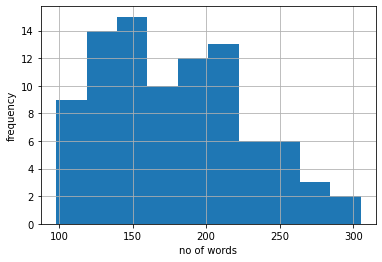

In [ ]:
train_df['resume'].apply(lambda x:len(x.split(' '))).hist()
plt.xlabel('no of words')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

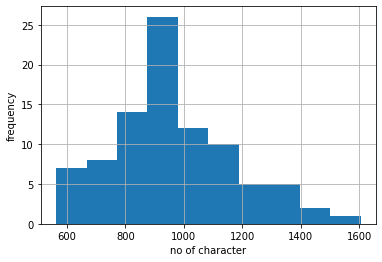

In [ ]:
train_df['resume'].apply(lambda x:len(x)).hist()
plt.xlabel('no of character')
plt.ylabel('frequency')

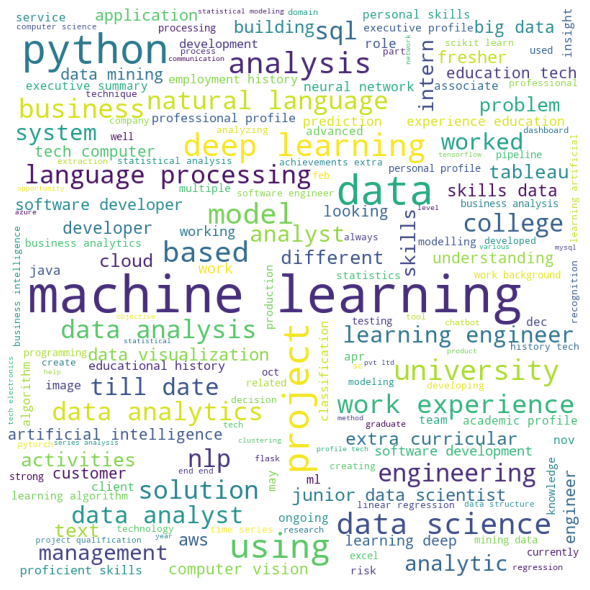

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in train_df.resume:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()	
  
	comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()




Rumes are lelated to the machine learning positions



### > Cleaning of resumes



In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleanResume(resumeText):
 resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
 resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
 resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
 resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
 resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
 resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
 resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace

 resumeText = resumeText.lower()
 resumeText = resumeText.split()
 resumeText = [PorterStemmer().stem(word) for word in resumeText if word not in stopwords.words('english') and word not in string.punctuation]
 resumeText = ' '.join(resumeText)
 return resumeText

In [ ]:
train_df['cleaned_resume'] = train_df.resume.apply(lambda x: cleanResume(x))
test_df['cleaned_resume'] = test_df.resume.apply(lambda x: cleanResume(x))

In [ ]:
train_df.head()

,Match Percentage,CandidateID,resume,cleaned_resume
CandidateID,,,,
candidate_011,13.60,candidate_011,L I A M A N D R E W S FRESHER WORK EXPERIE...,l n r e w fresher work experi intern traine ja...
candidate_113,36.63,candidate_113,Ellie Mackey F R E S H E R I N T E R N Exe...,elli mackey f r e h e r n e r n execut profil ...
candidate_123,54.93,candidate_123,"Telco Trainee Intern, May 2018 - Dec 2018 ...",telco traine intern may 2018 dec 2018 data han...
candidate_012,41.46,candidate_012,JIMMY GARTNER D A T A M A N A G E ...,jimmi ga ner n g e r profession profil look op...
candidate_002,48.91,candidate_002,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",amz loan mortgag erc analyt jun 2019 till date...


In [ ]:
jd_raw = parser.from_file("/content/drive/MyDrive/Colab Notebooks/Assignments/Self Case Study 1/dataset/Job description.pdf")
jd_content =' '.join(jd_raw['content'].strip().split('\n')[1:]) 
jd_content = cleanResume(jd_content)
train_df['JD'] = jd_content
test_df['JD'] = jd_content
train_df.head()

,Match Percentage,CandidateID,resume,cleaned_resume,JD
CandidateID,,,,,
candidate_011,13.60,candidate_011,L I A M A N D R E W S FRESHER WORK EXPERIE...,l n r e w fresher work experi intern traine ja...,machin learn engin 13585abc knowledg innov foc...
candidate_113,36.63,candidate_113,Ellie Mackey F R E S H E R I N T E R N Exe...,elli mackey f r e h e r n e r n execut profil ...,machin learn engin 13585abc knowledg innov foc...
candidate_123,54.93,candidate_123,"Telco Trainee Intern, May 2018 - Dec 2018 ...",telco traine intern may 2018 dec 2018 data han...,machin learn engin 13585abc knowledg innov foc...
candidate_012,41.46,candidate_012,JIMMY GARTNER D A T A M A N A G E ...,jimmi ga ner n g e r profession profil look op...,machin learn engin 13585abc knowledg innov foc...
candidate_002,48.91,candidate_002,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",amz loan mortgag erc analyt jun 2019 till date...,machin learn engin 13585abc knowledg innov foc...


In [ ]:
test_df.head()

,CandidateID,resume,cleaned_resume,JD
CandidateID,,,,
candidate_014,candidate_014,GRACE BAILRY M A C H I N E L E A R N I N G ...,grace bailri c h n e l e r n n g e v e l p e n...,machin learn engin 13585abc knowledg innov foc...
candidate_098,candidate_098,"VoyaGenius Labs Software Developer (ML), De...",voyageniu lab softwar develop ml dec 2018 ongo...,machin learn engin 13585abc knowledg innov foc...
candidate_075,candidate_075,KEIRON PAVARD D A T A E N G I N E E R SKIL...,keiron pavard e n g n e e r skill data engin d...,machin learn engin 13585abc knowledg innov foc...
candidate_016,candidate_016,A M E L I A M A R T I N DATA SCIENCE MAJOR ...,e l r n data scienc major work experi na acade...,machin learn engin 13585abc knowledg innov foc...
candidate_131,candidate_131,ZACHARY PEREZ P R O F I L E Good knowledge ...,zachari perez p r f l e good knowledg c oop co...,machin learn engin 13585abc knowledg innov foc...


Featurization

In [ ]:
def get_features(s1,s2):
 feature=[0.0]*9
 resume_no_word = len(s1.split(' '))
 JD_no_word = len(s2.split(' '))
 feature[0] = resume_no_word
 feature[1] = JD_no_word

 w1 = set(map(lambda word: word.lower().strip(),s1.split(' ')))
 w2 = set(map(lambda word: word.lower().strip(),s2.split(' ')))
 feature[2] = 1.0 * len(w1 & w2)
 feature[3] = 1.0 * (len(w1) + len(w2))
 feature[4] =  1.0 * len(w1 & w2)/(len(w1) + len(w2))
  # fuzz_ratio
 feature[5] = fuzz.QRatio(s1, s2)
 # fuzz_partial_ratio
 feature[6] = fuzz.partial_ratio(s1, s2)
 # token_sort_ratio
 feature[7] = fuzz.token_sort_ratio(s1, s2)
   # token_set_ratio
 feature[8] = fuzz.token_set_ratio(s1, s2)
 return feature

In [ ]:
feature = train_df.apply(lambda x: get_features(x['resume'], x['JD']), axis=1)
train_df['resume_no_word']=list(map(lambda x: x[0], feature))
train_df['JD_no_word']=list(map(lambda x: x[1], feature))
train_df['word_common']=list(map(lambda x: x[2], feature))
train_df['word_total']=list(map(lambda x: x[3], feature))
train_df['word_share']=list(map(lambda x: x[4], feature))
train_df['fuzz_ratio'] = list(map(lambda x: x[5], feature))
train_df['fuzz_partial_ratio'] = list(map(lambda x: x[6], feature))
train_df['token_sort_ratio'] = list(map(lambda x: x[7], feature))
train_df['token_set_ratio'] = list(map(lambda x: x[8], feature))

In [ ]:
feature = test_df.apply(lambda x: get_features(x['resume'], x['JD']), axis=1)
test_df['resume_no_word']=list(map(lambda x: x[0], feature))
test_df['JD_no_word']=list(map(lambda x: x[1], feature))
test_df['word_common']=list(map(lambda x: x[2], feature))
test_df['word_total']=list(map(lambda x: x[3], feature))
test_df['word_share']=list(map(lambda x: x[4], feature))
test_df['fuzz_ratio'] = list(map(lambda x: x[5], feature))
test_df['fuzz_partial_ratio'] = list(map(lambda x: x[6], feature))
test_df['token_sort_ratio'] = list(map(lambda x: x[7], feature))
test_df['token_set_ratio'] = list(map(lambda x: x[8], feature))


In [ ]:
train_df.head()

,Match Percentage,CandidateID,resume,cleaned_resume,JD,resume_no_word,JD_no_word,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
CandidateID,,,,,,,,,,,,,,
candidate_011,13.60,candidate_011,L I A M A N D R E W S FRESHER WORK EXPERIE...,l n r e w fresher work experi intern traine ja...,machin learn engin 13585abc knowledg innov foc...,136,159,3.0,224.0,0.013393,2,2,1,6
candidate_113,36.63,candidate_113,Ellie Mackey F R E S H E R I N T E R N Exe...,elli mackey f r e h e r n e r n execut profil ...,machin learn engin 13585abc knowledg innov foc...,136,159,6.0,227.0,0.026432,1,10,1,13
candidate_123,54.93,candidate_123,"Telco Trainee Intern, May 2018 - Dec 2018 ...",telco traine intern may 2018 dec 2018 data han...,machin learn engin 13585abc knowledg innov foc...,126,159,5.0,216.0,0.023148,2,2,4,9
candidate_012,41.46,candidate_012,JIMMY GARTNER D A T A M A N A G E ...,jimmi ga ner n g e r profession profil look op...,machin learn engin 13585abc knowledg innov foc...,196,159,9.0,252.0,0.035714,0,3,3,11
candidate_002,48.91,candidate_002,"AMZ Loans and Mortgages ERC Analytics, Jun 2...",amz loan mortgag erc analyt jun 2019 till date...,machin learn engin 13585abc knowledg innov foc...,141,159,4.0,230.0,0.017391,0,1,1,11


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()


text1 = list(list(train_df['resume']))
text2 = list(train_df['JD'])
# Fit the vectorizer
print('Fitting')
vectorizer1.fit(train_df['resume'].values)
vectorizer2.fit(train_df['JD'].values)


print('Vectorizing resume')
resume_vecs_tfidf_train = vectorizer1.transform(train_df['resume'].values)
resume_vecs_tfidf_test = vectorizer1.transform(test_df['resume'].values)

print('Vectorizing jd')
jd_vecs_tfidf_train = vectorizer2.transform(train_df['JD'].values)
jd_vecs_tfidf_test = vectorizer2.transform(test_df['JD'].values)

Fitting
Vectorizing resume
Vectorizing jd


In [ ]:
pickle. dump(vectorizer1, open('vectorizer_resume.pkl', 'wb'))
pickle. dump(vectorizer2, open('vectorizer_jd.pkl', 'wb'))

In [ ]:
print('Converting to DataFrames')
resume_tfidf_train = pd.DataFrame.sparse.from_spmatrix(resume_vecs_tfidf_train)
jd_tfidf_train = pd.DataFrame.sparse.from_spmatrix(jd_vecs_tfidf_train)

resume_tfidf_test = pd.DataFrame.sparse.from_spmatrix(resume_vecs_tfidf_test)
jd_tfidf_test = pd.DataFrame.sparse.from_spmatrix(jd_vecs_tfidf_test)

print(resume_tfidf_train.shape)
print(jd_tfidf_train.shape)
print(resume_tfidf_test.shape)
print(jd_tfidf_test.shape)

Converting to DataFrames
(90, 2182)
(90, 126)
(60, 2182)
(60, 126)


In [ ]:
train_df.head(1)

,Match Percentage,CandidateID,resume,cleaned_resume,JD,resume_no_word,JD_no_word,word_common,word_total,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
CandidateID,,,,,,,,,,,,,,
candidate_011,13.6,candidate_011,L I A M A N D R E W S FRESHER WORK EXPERIE...,l n r e w fresher work experi intern traine ja...,machin learn engin 13585abc knowledg innov foc...,136,159,3.0,224.0,0.013393,2,2,1,6


In [ ]:
X = train_df[['resume_no_word', 'JD_no_word','word_common', 'word_total', 'word_share' ,'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']]
Y = train_df['Match Percentage']

In [ ]:
test_model = test_df[['resume_no_word', 'JD_no_word','word_common', 'word_total', 'word_share' ,'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']]

In [ ]:
model_train = np.hstack((X, resume_tfidf_train, jd_tfidf_train))
model_test = np.hstack((test_model, resume_tfidf_test, jd_tfidf_test))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_train, Y, test_size = 0.1)

### **Training**

### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

117.11600470650102
10.822014817329581


In [ ]:
import pickle
pickle. dump(lm, open('LinearRegression.pkl', 'wb'))

In [ ]:
ans = lm.predict(model_test)
final1 = pd.DataFrame()
final1['CandidateID'] = test_df['CandidateID']
final1['Match Percentage'] = ans
final1.to_csv("LR1.csv", index = False)

### SVM

In [ ]:
from sklearn.svm import SVR 

In [ ]:
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred2 =regressor.predict(X_test)
print(mean_squared_error(y_test, y_pred2))
print(math.sqrt(mean_squared_error(y_test, y_pred2)))

202.36448275853053
14.225487083349046


### ANN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(2317, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

model.compile(
    loss='mean_squared_error', 
    optimizer=Adam(learning_rate=0.01)
)

history = model.fit(X_train, y_train,epochs=250)

Epoch 1/250
3/3 [==============================] - 1s 70ms/step - loss: 68291.9062
Epoch 2/250
3/3 [==============================] - 0s 47ms/step - loss: 41366.0742
Epoch 3/250
3/3 [==============================] - 0s 73ms/step - loss: 10595.3047
Epoch 4/250
3/3 [==============================] - 0s 61ms/step - loss: 5205.7241
Epoch 5/250
3/3 [==============================] - 0s 56ms/step - loss: 9383.2979
Epoch 6/250
3/3 [==============================] - 0s 76ms/step - loss: 2610.4277
Epoch 7/250
3/3 [==============================] - 0s 79ms/step - loss: 581.1519
Epoch 8/250
3/3 [==============================] - 0s 50ms/step - loss: 2097.4001
Epoch 9/250
3/3 [==============================] - 0s 74ms/step - loss: 2268.5112
Epoch 10/250
3/3 [==============================] - 0s 44ms/step - loss: 1106.5691
Epoch 11/250
3/3 [==============================] - 0s 59ms/step - loss: 297.9316
Epoch 12/250
3/3 [==============================] - 0s 70ms/step - loss: 335.8235
Epoch 13/250


In [ ]:
pickle. dump(lm, open('ANN model.pkl', 'wb'))

In [ ]:
y_pred1 = model.predict(X_test)
y_pred1

array([[34.28441 ],
       [38.033264],
       [44.0801  ],
       [30.567799],
       [32.660164],
       [39.991936],
       [47.47651 ],
       [43.78239 ],
       [31.06146 ]], dtype=float32)

In [ ]:
y_test

CandidateID
candidate_037    56.70
candidate_083    44.36
candidate_096    47.51
candidate_041     4.81
candidate_081    38.10
candidate_010    40.64
candidate_064    48.20
candidate_138    51.05
candidate_142    35.77
Name: Match Percentage, dtype: float64

In [ ]:
X_test[0]

array([1.6700000e+02, 1.5900000e+02, 5.0000000e+00, ..., 5.9868434e-02,
       5.9868434e-02, 5.9868434e-02])

In [ ]:
ans1 = model.predict(model_test)
final1 = pd.DataFrame()
final1['CandidateID'] = test_df['CandidateID']
final1['Match Percentage'] = ans1
final1.to_csv("ANN.csv", index = False)